# Preprocess for Regression

In [1]:
# 5 λεπτά

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

data = pd.read_csv("/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/datasets/OnlineNewsPopularity.txt")
X = data.iloc[:,0:60]
y = data.iloc[:,-1]
initRows = np.shape(data)[0]
print("Initial dataset dimensions: " + str(np.shape(data)))

Initial dataset dimensions: (39644, 61)


In [2]:
data.head(2)

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.35000,-0.600,-0.2,0.5,-0.1875,0.0,0.1875,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.11875,-0.125,-0.1,0.0,0.0000,0.5,0.0000,711


<br><br><br><br>
## Preprocess dataset

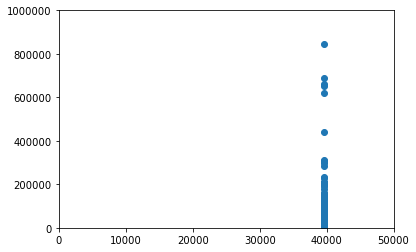

In [3]:
# ζωγραφίζω τις τιμές των "shares" σε ένα γράφημα για να εντοπήσω τα outliers

yaxes = np.linspace(39644,39644,39644)
plt.xlim(0,50000)
plt.ylim(0,1000000)
plt.scatter(yaxes,y)
plt.savefig("outliers_yes.png")

In [4]:
index = []
for i in range(np.shape(data)[0]):
    if y[i] < 26647:
        index.append(1)
    else:
        index.append(0)

data = np.array(data)     
data2 = [[0 for x in range(61)] for y in range(39130)]
k = 0

for i in range(np.shape(index)[0]):
    if index[i] == 1:
        for j in range(61):
            data2[k][j] = data[i][j]
        k = k + 1
np.shape(data2)

y2 = np.zeros(39130)
for i in range(39130):
    y2[i] = data2[i][60]

In [5]:
pd.DataFrame(y).describe()

,shares
count,39644.000000
mean,3395.380184
std,11626.950749
min,1.000000
25%,946.000000
50%,1400.000000
75%,2800.000000
max,843300.000000


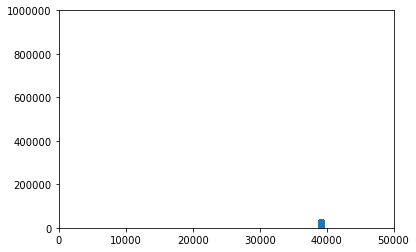

In [6]:
data2 = pd.DataFrame(data2)
data2.columns = ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',  'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',  'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

# ζωγραφίζω τις τιμές των "shares" και παρατηρώ ότι έχουν εξαφανιστεί τα outliers
yaxes = np.linspace(np.shape(data2)[0],np.shape(data2)[0],np.shape(data2)[0])
plt.xlim(0,50000)
plt.ylim(0,1000000)
plt.scatter(yaxes,y2)
plt.savefig("outliers_no.png")

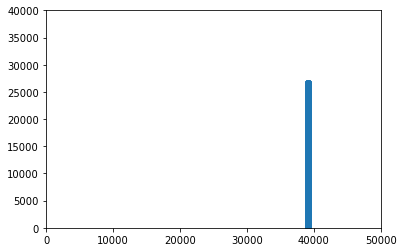

In [7]:
# κάνω ζουμ

data2 = pd.DataFrame(data2)
data2.columns = ['url', 'timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',  'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',  'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']

# ζωγραφίζω τις τιμές των "shares" και παρατηρώ ότι έχουν εξαφανιστεί τα outliers
yaxes = np.linspace(np.shape(data2)[0],np.shape(data2)[0],np.shape(data2)[0])
plt.xlim(0,50000)
plt.ylim(0,40000)
plt.scatter(yaxes,y2)
plt.savefig("outliers_no_zoom.png")

In [8]:
print("outliers was " + str(100 * (-np.shape(data2)[0] + initRows) / np.shape(data2)[0]) + " % of the trainset")

outliers was 1.313570150779453 % of the trainset


<br><br>
**Drop columns**

In [9]:
# αφαιρώ τη στήλη "url" --> δεν παρέχει κάποια χρήσιμη πληροφορία για regression/classification
# το url είναι μοναδικό, δηλ είναι κάτι σαν κλειδί, δεν έχει χρησιμη πληροφορία
data2 = data2.drop('url', axis=1)
X2 = data2.iloc[:,0:59]
y2 = data2.iloc[:,-1]
np.shape(data2)

(39130, 60)

<br><br>
**Normalization**

In [10]:
data2 = data2.drop('shares', axis=1)

In [11]:
from sklearn.preprocessing import MinMaxScaler
data2 = MinMaxScaler().fit_transform(data2)

data2 = pd.DataFrame(data2)
data2['shares'] = y2
data2.columns = ['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'data_channel_is_lifestyle', 'data_channel_is_entertainment', 'data_channel_is_bus', 'data_channel_is_socmed', 'data_channel_is_tech', 'data_channel_is_world',  'kw_min_min', 'kw_max_min', 'kw_avg_min', 'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares', 'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',  'weekday_is_sunday', 'is_weekend', 'LDA_00', 'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'rate_positive_words','rate_negative_words', 'avg_positive_polarity', 'min_positive_polarity', 'max_positive_polarity', 'avg_negative_polarity', 'min_negative_polarity', 'max_negative_polarity', 'title_subjectivity', 'title_sentiment_polarity', 'abs_title_subjectivity', 'abs_title_sentiment_polarity', 'shares']
X2 = data2.iloc[:,0:59]
y2 = data2.iloc[:,59]
data2.head(2)

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,1.0,0.476190,0.025844,0.000947,0.00096,0.001254,0.013158,0.017241,0.007812,0.0,...,0.100000,0.7,0.65000,0.400,0.8,0.5,0.40625,0.0,0.1875,593
1,1.0,0.333333,0.030092,0.000863,0.00096,0.001218,0.009868,0.008621,0.007812,0.0,...,0.033333,0.7,0.88125,0.875,0.9,0.0,0.50000,1.0,0.0000,711


In [14]:
## σώζω για το regression

## dummy trap
data2 = data2.drop('is_weekend', axis=1)
data2 = data2.drop('data_channel_is_bus', axis=1)
data2 = data2.drop('weekday_is_monday', axis=1)

X2 = data2.iloc[:,0:56]
y2 = data2.iloc[:,56]

In [15]:
np.savetxt('/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/datasets/OnlineNewsPopularity_Regression.txt', data2, delimiter=',', header='timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares', comments='')       

<br><br>**Feature Selection**

In [16]:
# Βρίσκω τα καλύτερα features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=56).fit(X2,y2)
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(X2.columns)

featureScores = pd.concat([columns,scores], axis=1)
featureScores.columns = ['Specs', 'Scores']
featureScores.nlargest(56,'Scores')

,Specs,Scores
16,data_channel_is_world,1876.035892
13,data_channel_is_entertainment,1643.003534
14,data_channel_is_socmed,1258.404829
33,weekday_is_saturday,1249.149260
15,data_channel_is_tech,1159.933253
12,data_channel_is_lifestyle,1122.384716
34,weekday_is_sunday,1075.944869
30,weekday_is_wednesday,1028.411766
29,weekday_is_tuesday,1023.687672
31,weekday_is_thursday,991.317578


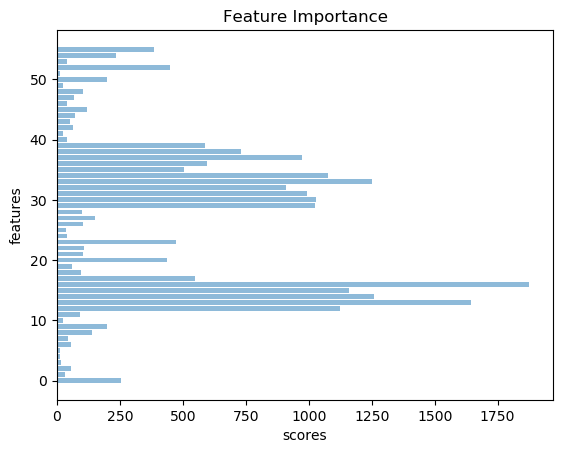

In [17]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = featureScores.iloc[:,0]
y_pos = np.arange(len(objects))
performance = featureScores.iloc[:,1]
 
plt.barh(y_pos, performance, align='center', alpha=0.5)
#plt.yticks(y_pos, objects)
plt.ylabel('features')
plt.xlabel('scores')
plt.title('Feature Importance')
plt.savefig("Feature scores.png")
plt.show()

In [18]:
# Κρατάω μόνο τα καλύτερα, δηλ αυτά με σκορ > 400, δηλ μόνο 22
# Βρίσκω τα καλύτερα features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2, k=22).fit(X2,y2)
scores = pd.DataFrame(bestfeatures.scores_)
columns = pd.DataFrame(X2.columns)

best = pd.concat([columns,scores], axis=1)
best.columns = ['Specs', 'Scores']
best = best.nlargest(22,'Scores')

best = best.reset_index()
best = best.drop('index', axis=1)

In [19]:
toDrop = []
for i in range(np.shape(data2)[1]):
    counter = 0
    for j in range(np.shape(best)[0]):
        if best.iloc[:,0][j] == data2.columns[i]:
            counter = 1
            break
    if counter == 0:
        if data2.columns[i] == "shares":
                continue
        else:
            toDrop.append(data2.columns[i])

In [20]:
for i in range(np.shape(toDrop)[0]):
    data2 = data2.drop(toDrop[i], axis=1)

In [21]:
X2 = data2.iloc[:,0:22]
y2 = data2.iloc[:,22]

In [22]:
## σώζω για το regression feature selection
np.savetxt('/home/apostolis/Επιφάνεια εργασίας/εργασία εξαμήνου (μηχανική μάθηση)/datasets/OnlineNewsPopularity_Regression FS.txt', data2, delimiter=',', header='timedelta,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_min_max,kw_min_avg,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,title_subjectivity,abs_title_sentiment_polarity,shares', comments='')       